In [44]:
import pandas as pd

mux = pd.read_csv("./MuxspaceDataset/data/new_legend.csv", usecols=["emotion", "image"])
fer = pd.read_csv("./KaggleFERDataset/icml_face_data.csv", usecols=["emotion", " pixels"])

print(mux.shape)
print(fer.shape)

(13681, 2)
(35887, 2)


In [120]:
combined = pd.DataFrame(columns=["emotion", "image"," pixels"])
combined = combined.append(mux)
combined = combined.append(fer)
combined.shape

(49568, 3)

In [73]:
combined["emotion"].value_counts()

3    14685
6    13066
4     6345
0     5205
2     5142
5     4370
1      755
Name: emotion, dtype: int64

In [106]:
"""
To ensure equal number of samples, use 755 as total
"""
emotions = [combined[combined.emotion == 0], combined[combined.emotion == 1], combined[combined.emotion == 2], 
           combined[combined.emotion == 3], combined[combined.emotion == 4], combined[combined.emotion == 5],
           combined[combined.emotion == 6]]

training = pd.DataFrame(columns=["emotion", "image"," pixels"])
validation = pd.DataFrame(columns=["emotion", "image"," pixels"])
test = pd.DataFrame(columns=["emotion", "image"," pixels"])

for emotion in emotions:
    sample = emotion.sample(n=755, random_state=1)
    training = training.append(sample[:int(0.7*sample.shape[0])])
    valid_and_test = sample[int(0.7*sample.shape[0]):]
    validation = validation.append(valid_and_test[:int(0.5*valid_and_test.shape[0])])
    test = test.append(valid_and_test[int(0.5*valid_and_test.shape[0]):])

print(training.shape)
print(validation.shape)
print(test.shape)

(3696, 3)
(791, 3)
(798, 3)


In [107]:
training.to_csv('./training.csv',index=False)
validation.to_csv('./validation.csv', index=False)
test.to_csv('./test.csv', index=False)

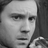

In [141]:
"""
The following are examples for applying transformations to pixel values:
1. Resize image
"""
from PIL import Image

image_pixels = fer.iloc[0][" pixels"]
image_string = image_pixels.split(' ')
image_data = np.asarray(image_string, dtype=np.uint8).reshape(48, 48)
Image.fromarray(image_data)

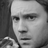

In [142]:
"""
2. Flip image along vertical axis
"""
Image.fromarray(np.fliplr(image_data))

In [149]:
"""
Load image and label to dataloader
"""
train_data = []
for i in range(len(image_data)):
    train_data.append([image_data[i], "label"])

trainloader = torch.utils.data.DataLoader(train_data, batch_size=100)
image, label = next(iter(trainloader))